In [29]:
#library

import pandas as pd 
import numpy as np

In [30]:
pd.options.display.max_rows=100

In [31]:
#importation des données 
test_df = pd.read_csv('C:/Users/Utilisateur/Documents/SIAD/M2/projet BigData/test.csv')
train_df = pd.read_csv('C:/Users/Utilisateur/Documents/SIAD/M2/projet BigData/train.csv')

In [32]:
train_df.columns


Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [33]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [34]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

Comme nous pouvons le constater, les variables Alley, FireplaceQu, PoolQC, Fence, MiscFeature  ne contiennent pas assez de modalités. Nous avons donc decidé de les supprimé 

In [35]:
# vérifier s'il ya de lignes qui sont dupliquées 
train_df.duplicated().sum()
test_df.duplicated().sum()

0

Nous n'avons aucune ligne dupliquée

In [36]:
#valeurs manquantes dans df-train
percent_missing_train = train_df.isnull().sum() * 100 / len(train_df)
missing_value_df_train = pd.DataFrame({'Colonne': train_df.columns,
                                 'Pourcentage': percent_missing_train})


missing_value_df_train.sort_values('Pourcentage', inplace=True)
missing_value_df_train

,Colonne,Pourcentage
Id,Id,0.000000
TotalBsmtSF,TotalBsmtSF,0.000000
Heating,Heating,0.000000
SaleCondition,SaleCondition,0.000000
CentralAir,CentralAir,0.000000
1stFlrSF,1stFlrSF,0.000000
2ndFlrSF,2ndFlrSF,0.000000
LowQualFinSF,LowQualFinSF,0.000000
GrLivArea,GrLivArea,0.000000
BsmtFullBath,BsmtFullBath,0.000000


In [37]:
#valeurs manquantes dans df-test
percent_missing_test = test_df.isnull().sum() * 100 / len(test_df)
missing_value_df_test = pd.DataFrame({'Colonne': test_df.columns,
                                 'Pourcentage': percent_missing_test})


missing_value_df_test.sort_values('Pourcentage', inplace=True)
missing_value_df_test

,Colonne,Pourcentage
Id,Id,0.000000
Foundation,Foundation,0.000000
HeatingQC,HeatingQC,0.000000
CentralAir,CentralAir,0.000000
Electrical,Electrical,0.000000
1stFlrSF,1stFlrSF,0.000000
2ndFlrSF,2ndFlrSF,0.000000
LowQualFinSF,LowQualFinSF,0.000000
GrLivArea,GrLivArea,0.000000
FullBath,FullBath,0.000000


TEST
GarageArea	GarageArea	0.068540
KitchenQual	KitchenQual	0.068540
GarageCars	GarageCars	0.068540
TotalBsmtSF	TotalBsmtSF	0.068540
Exterior1st	Exterior1st	0.068540
Exterior2nd	Exterior2nd	0.068540
BsmtFinSF1	BsmtFinSF1	0.068540
BsmtFinSF2	BsmtFinSF2	0.068540
SaleType	SaleType	0.068540
BsmtUnfSF	BsmtUnfSF	0.068540
BsmtFullBath	BsmtFullBath	0.137080
Functional	Functional	0.137080
Utilities	Utilities	0.137080
BsmtHalfBath	BsmtHalfBath	0.137080
MSZoning	MSZoning	0.274160
MasVnrArea	MasVnrArea	1.028101
MasVnrType	MasVnrType	1.096642

TRAIN
Electrical	Electrical	0.068493
MasVnrArea	MasVnrArea	0.547945
MasVnrType	MasVnrType	0.547945




In [10]:
#percent_missing_test

Comme nous pouvons le constater, les variables Alley, FireplaceQu, PoolQC, Fence, MiscFeature  ne contiennent pas assez de modalités. En effet, ces variables ont plus de 50% de données manquantes. 
Nous avons donc decidé de les supprimé 

In [38]:
train_df = train_df.drop(['Alley','PoolQC', 'Fence', 'MiscFeature','FireplaceQu'], axis ='columns')
test_df = test_df.drop(['Alley','PoolQC', 'Fence', 'MiscFeature','FireplaceQu'], axis ='columns')

Pour les données manquantes, nous avons fixé un seuil égal à 2% Nous supprimons donc toutes les lignes qui ont moins de 2% de données manquantes. Nous supprimons : 
TEST
GarageArea	GarageArea	0.068540
KitchenQual	KitchenQual	0.068540
GarageCars	GarageCars	0.068540
TotalBsmtSF	TotalBsmtSF	0.068540
Exterior1st	Exterior1st	0.068540
Exterior2nd	Exterior2nd	0.068540
BsmtFinSF1	BsmtFinSF1	0.068540
BsmtFinSF2	BsmtFinSF2	0.068540
SaleType	SaleType	0.068540
BsmtUnfSF	BsmtUnfSF	0.068540
BsmtFullBath	BsmtFullBath	0.137080
Functional	Functional	0.137080
Utilities	Utilities	0.137080
BsmtHalfBath	BsmtHalfBath	0.137080
MSZoning	MSZoning	0.274160
MasVnrArea	MasVnrArea	1.028101
MasVnrType	MasVnrType	1.096642


Electrical	Electrical	0.068493
MasVnrArea	MasVnrArea	0.547945
MasVnrType	MasVnrType	0.547945

In [48]:
test_df.shape

(1431, 75)

In [47]:
# suppression des lignes avec des données manquantes dans df_test
test_df=test_df.dropna(subset=['GarageCars', 'GarageArea','KitchenQual','Exterior1st','SaleType','TotalBsmtSF','BsmtUnfSF','Exterior2nd',
                       'SaleType','TotalBsmtSF','BsmtUnfSF','Exterior2nd','BsmtFinSF1','BsmtFinSF2','BsmtFullBath','Functional',
                       'Utilities','BsmtHalfBath','Electrical','MasVnrType', 'Electrical','MasVnrArea','MSZoning'])       

In [42]:
train_df.shape

(1451, 76)

In [41]:
# suppression des lignes avec des données manquantes dans df_train
train_df=train_df.dropna(subset=['GarageCars', 'GarageArea','KitchenQual','Exterior1st','SaleType','TotalBsmtSF','BsmtUnfSF','Exterior2nd',
                       'SaleType','TotalBsmtSF','BsmtUnfSF','Exterior2nd','BsmtFinSF1','BsmtFinSF2','BsmtFullBath','Functional',
                       'Utilities','BsmtHalfBath','Electrical','MasVnrType', 'Electrical','MasVnrArea','MSZoning'])

Maintenant, nous allons traiter les variables ayant des données manquantes comprises entre 2% et 5%. Il s'agit de : 

test
BsmtFinType2	BsmtFinType2	2.878684
BsmtFinType1	BsmtFinType1	2.878684
BsmtExposure	BsmtExposure	3.015764
BsmtQual	BsmtQual	3.015764
BsmtCond	BsmtCond	3.084304
GarageType	GarageType	5.209047
GarageFinish	GarageFinish	5.346127
GarageYrBlt	GarageYrBlt	5.346127
GarageQual	GarageQual	5.346127
GarageCond	GarageCond	5.346127
LotFrontage	LotFrontage	15.558602

train
BsmtQual	BsmtQual	2.534247
BsmtCond	BsmtCond	2.534247
BsmtFinType1	BsmtFinType1	2.534247
BsmtFinType2	BsmtFinType2	2.602740
BsmtExposure	BsmtExposure	2.602740
GarageYrBlt	GarageYrBlt	5.547945
GarageQual	GarageQual	5.547945
GarageCond	GarageCond	5.547945
GarageType	GarageType	5.547945
GarageFinish	GarageFinish	5.547945
LotFrontage	LotFrontage	17.739726

In [43]:
# on remplace les données manquantes des variables numériques par la moyenne

train_df['GarageYrBlt'].fillna(train_df['GarageYrBlt'].mean(),inplace = True)
train_df['LotFrontage'].fillna(train_df['LotFrontage'].mean(),inplace = True)

test_df['GarageYrBlt'].fillna(test_df['GarageYrBlt'].mean(),inplace = True)
test_df['LotFrontage'].fillna(test_df['LotFrontage'].mean(),inplace = True)

In [26]:
#train_df['Electrical'].value_counts()
#train_df['Electrical'] = train_df['Electrical'].fillna(train_df['Electrical'].mode())
# Pour les variables catégorielles, on remplace les données manquantes par la 
#train_df.fillna(train_df.mode().iloc[42])

In [44]:
#train_df['Electrical'] = train_df['Electrical'].fillna(train_df['Electrical'].mode())

train_df['BsmtQual'].value_counts()
train_df['BsmtQual'].fillna('TA',inplace = True)

train_df['BsmtCond'].value_counts()
train_df['BsmtCond'].fillna('TA',inplace = True)

train_df['BsmtFinType1'].value_counts()
train_df['BsmtFinType1'].fillna('Unf',inplace = True)

train_df['BsmtFinType2'].value_counts()
train_df['BsmtFinType2'].fillna('Unf',inplace = True)

train_df['BsmtExposure'].value_counts()
train_df['BsmtExposure'].fillna('No',inplace = True)

train_df['GarageQual'].value_counts()
train_df['GarageQual'].fillna('TA',inplace = True)


train_df['GarageCond'].value_counts()
train_df['GarageCond'].fillna('TA',inplace = True)


train_df['GarageType'].value_counts()
train_df['GarageType'].fillna('Attchd',inplace = True)


train_df['GarageFinish'].value_counts()
train_df['GarageFinish'].fillna('Unf',inplace = True)
#####
test_df['BsmtQual'].value_counts()
test_df['BsmtQual'].fillna('TA',inplace = True)

test_df['BsmtCond'].value_counts()
test_df['BsmtCond'].fillna('TA',inplace = True)

test_df['BsmtFinType1'].value_counts()
test_df['BsmtFinType1'].fillna('Unf',inplace = True)

test_df['BsmtFinType2'].value_counts()
test_df['BsmtFinType2'].fillna('Unf',inplace = True)

test_df['BsmtExposure'].value_counts()
test_df['BsmtExposure'].fillna('No',inplace = True)

test_df['GarageQual'].value_counts()
test_df['GarageQual'].fillna('TA',inplace = True)


test_df['GarageCond'].value_counts()
test_df['GarageCond'].fillna('TA',inplace = True)


test_df['GarageType'].value_counts()
test_df['GarageType'].fillna('Attchd',inplace = True)


test_df['GarageFinish'].value_counts()
test_df['GarageFinish'].fillna('Unf',inplace = True)

In [45]:
#Verification si les valeurs manquantes sont traitées
#valeurs manquantes dans df-train
percent_missing_train2 = train_df.isnull().sum() * 100 / len(train_df)
missing_value_df_train2 = pd.DataFrame({'Colonne': train_df.columns,
                                 'Pourcentage': percent_missing_train2})


missing_value_df_train2.sort_values('Pourcentage', inplace=True)
missing_value_df_train2

,Colonne,Pourcentage
Id,Id,0.0
Functional,Functional,0.0
TotRmsAbvGrd,TotRmsAbvGrd,0.0
KitchenQual,KitchenQual,0.0
KitchenAbvGr,KitchenAbvGr,0.0
BedroomAbvGr,BedroomAbvGr,0.0
HalfBath,HalfBath,0.0
FullBath,FullBath,0.0
BsmtHalfBath,BsmtHalfBath,0.0
BsmtFullBath,BsmtFullBath,0.0


In [49]:
#valeurs manquantes dans df-test
percent_missing_test2 = test_df.isnull().sum() * 100 / len(test_df)
missing_value_df_test2 = pd.DataFrame({'Colonne': test_df.columns,
                                 'Pourcentage': percent_missing_test2})


missing_value_df_test2.sort_values('Pourcentage', inplace=True)
missing_value_df_test2

,Colonne,Pourcentage
Id,Id,0.0
TotRmsAbvGrd,TotRmsAbvGrd,0.0
KitchenQual,KitchenQual,0.0
KitchenAbvGr,KitchenAbvGr,0.0
BedroomAbvGr,BedroomAbvGr,0.0
HalfBath,HalfBath,0.0
FullBath,FullBath,0.0
BsmtHalfBath,BsmtHalfBath,0.0
BsmtFullBath,BsmtFullBath,0.0
GrLivArea,GrLivArea,0.0


In [20]:
train_df.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 76, dtype: int64

Comme on peut le voir notre base de données ne contient aucune données manquantes. 
Nous pouvons maintenant passer à l'exploration analytique de notre dataset.

# Statistiques descriptives 

In [50]:
print("structure de la base d'apprentissage : ",train_df.shape)
print("structure de la base de test: ",test_df.shape)

structure de la base d'apprentissage :  (1451, 76)
structure de la base de test:  (1431, 75)


Notre base d'apprentissage est constituée de 1460 modalités pour 76 variables. 

Regardons de plus près les propriétés statistiques de notre Dataset.

Tout d'abord, nous nous intéresserons à la distribution statistique de nos données numériques.  

In [51]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.00000,1451.000000,...,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000
mean,729.374225,56.933150,70.027638,10507.808408,6.093728,5.579600,1971.092350,1984.760165,103.75672,442.274983,...,94.412819,46.422467,21.952447,3.430737,15.154376,2.776017,43.758787,6.319090,2007.815300,180624.101999
std,421.737858,42.350366,22.040935,9992.987081,1.381467,1.113415,30.190266,20.651334,181.10815,455.369276,...,125.436852,66.060150,61.108223,29.406940,55.917522,40.301212,497.648467,2.700353,1.329376,79312.128273
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,364.500000,20.000000,60.000000,7537.500000,5.000000,5.000000,1954.000000,1966.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129900.000000
50%,729.000000,50.000000,70.027638,9477.000000,6.000000,5.000000,1972.000000,1993.000000,0.00000,381.000000,...,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,1094.500000,70.000000,79.000000,11600.000000,7.000000,6.000000,2000.000000,2004.000000,166.00000,707.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.00000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [52]:
# library pour la visualisation des données
import seaborn as sns
import matplotlib.pyplot as plt




Nous allons regarder la fréquence de nos variables catégorielles afin de faire un premier tri sur nos variables.

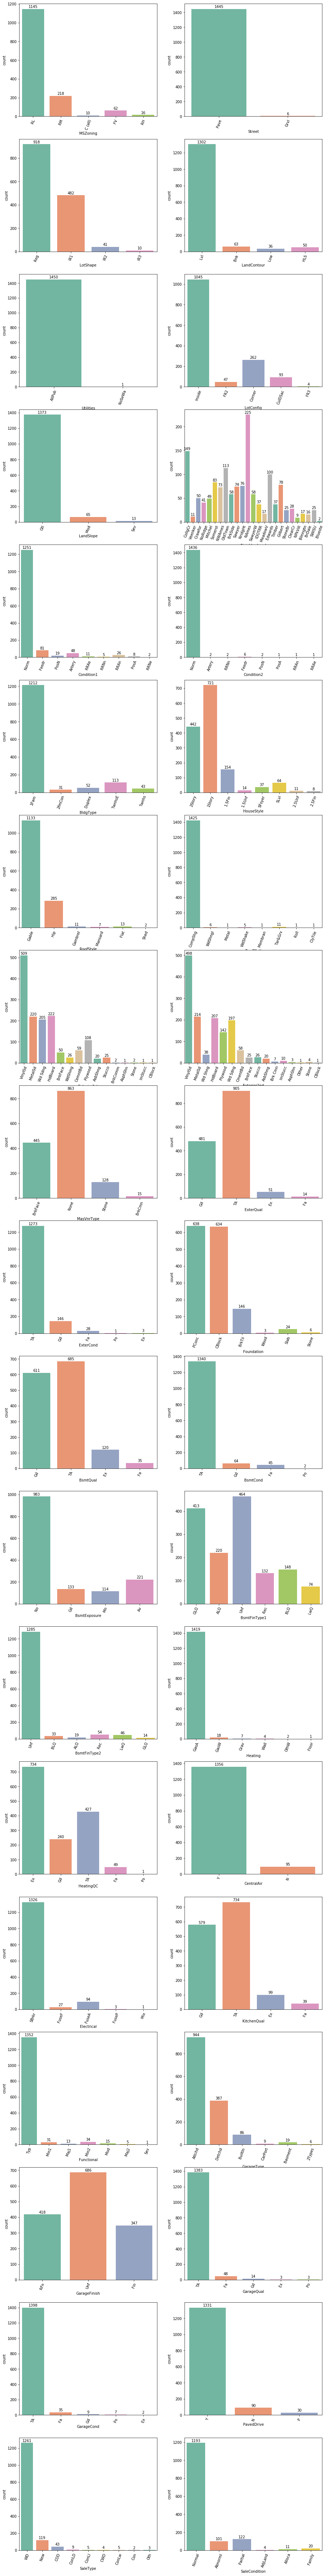

In [53]:
#créer une liste des variables catégorielles
categorielle = list(train_df.select_dtypes(include = [object]).columns)


#visualisation 

plt.figure(figsize=(15,150))
plotnumber=1
for c in categorielle:
    ax=plt.subplot(22,2,plotnumber)
    b= sns.countplot(x=train_df[c],palette='Set2')
    plt.xticks(rotation=70)
    plotnumber+=1
    for bar in b.patches:
        b.annotate(format(bar.get_height()),
            (bar.get_x() + bar.get_width() / 2,
            bar.get_height()), ha='center', va='center',
            size=10, xytext=(0, 6),textcoords='offset points')
plt.show()

Les variables ci-dessous ont des modalités avec de fréquences très hétérogènes. En effet, plus de 90% des données sont concentrées
dans une seule modalité. Cela fournit donc très peu d'informations dans l'ensemble de données. 
Ce sont : 

- La variable "Street", le type d'accès routier 
- "utilities", type d'utilitaires disponibles
- "condition 2"
- RoofMatl Matériau de toiture
- heating